In [290]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from cmath import *
import numpy as np
from scipy.linalg import expm, sinm, cosm, logm, sqrtm
from qiskit.quantum_info.synthesis import euler_angles_1q 

In [291]:
D = np.matrix('0 0; 0 3.9269908169872414')
P = np.matrix('1 0; 0 1')/sqrt(2)

H = P*D*P.I
H_ad = H.getH()

X = np.matrix([[0, 1],[1, 0]]) 
Y = np.matrix([[0, -1j],[1j, 0]]) 
Z = np.matrix([[1, 0],[0, -1]]) 

#H = Y;
#H = np.matrix([[1.5, 0.5],[0.5 , 1.5]])
U = np.matrix(expm(1j*H))
print(U)

[[ 1.        +0.j          0.        +0.j        ]
 [-0.        +0.j         -0.70710678-0.70710678j]]


In [292]:
H_ad==H

matrix([[ True,  True],
        [ True,  True]])

In [293]:
H=-1j*logm(U)
print(H)

[[ 0.        -0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        -0.00000000e+00j -2.35619449+1.01465364e-17j]]


In [294]:
h_eigenvalue = np.linalg.eigh(H)
eigenvalue = np.linalg.eig(U)
print(h_eigenvalue, eigenvalue)

(array([-2.35619449,  0.        ]), array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])) (array([ 1.        +0.j        , -0.70710678-0.70710678j]), matrix([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]))


In [295]:
exp(1j*h_eigenvalue[0][1])

(1+0j)

In [296]:
H,U

(array([[ 0.        -0.00000000e+00j,  0.        +0.00000000e+00j],
        [ 0.        -0.00000000e+00j, -2.35619449+1.01465364e-17j]]),
 matrix([[ 1.        +0.j        ,  0.        +0.j        ],
         [-0.        +0.j        , -0.70710678-0.70710678j]]))

In [297]:
theta = 0
phi = 0
lamb = 0

#m_90 = sqrtm(U)
#alpha = 14.0*pi/8.0
#U=np.matrix([[exp(1j*alpha), 0],[0 , exp(-1j*alpha)]])
theta,phi,lamb = euler_angles_1q(U)    

#lamb = phase = 14.0*pi/8.0
print(theta,phi,lamb)

0.0 -1.1780972450961729 -1.1780972450961729


{'0000': 508, '1010': 516}


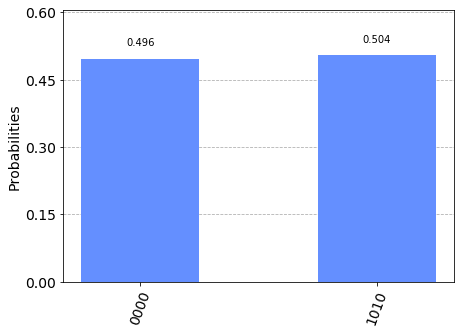

In [298]:
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-pi/float(2**(i-j)),q[j], q[i])
        qci.h(q[i])

def swap(qci, s1, s2):
    qci.cx(s1, s2)
    qci.cx(s2, s1)
    qci.cx(s1, s2)
    
n = 4
qr = QuantumRegister(n, 'qr')
ur = QuantumRegister(1, 'ur')
c = ClassicalRegister(n)
qc = QuantumCircuit(qr, ur, c)

qc.h(qr)
#qc.x(ur[0])
qc.h(ur[0])

qc.cu3(theta,phi,lamb, qr[3], ur[0]) # cU^1

qc.cu3(theta,phi,lamb, qr[2], ur[0]) # cU^2
qc.cu3(theta,phi,lamb, qr[2], ur[0]) # cU^2

qc.cu3(theta,phi,lamb, qr[1], ur[0]) # cU^4
qc.cu3(theta,phi,lamb, qr[1], ur[0]) # cU^4
qc.cu3(theta,phi,lamb, qr[1], ur[0]) # cU^4
qc.cu3(theta,phi,lamb, qr[1], ur[0]) # cU^4

qc.cu3(theta,phi,lamb, qr[0], ur[0]) # cU^8
qc.cu3(theta,phi,lamb, qr[0], ur[0]) # cU^8
qc.cu3(theta,phi,lamb, qr[0], ur[0]) # cU^8
qc.cu3(theta,phi,lamb, qr[0], ur[0]) # cU^8
qc.cu3(theta,phi,lamb, qr[0], ur[0]) # cU^8
qc.cu3(theta,phi,lamb, qr[0], ur[0]) # cU^8
qc.cu3(theta,phi,lamb, qr[0], ur[0]) # cU^8
qc.cu3(theta,phi,lamb, qr[0], ur[0]) # cU^8

iqft(qc, qr, n)

qc.measure(qr, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [299]:
def Text2List(table):
    list = [int(i, base=2) for i in table]
    size = len(table[0])
    tmp = sorted(list, key=int, reverse=False)  # values in ascending order
    result = [[int(bin(j)[2:].zfill(size)[i]) for i in range(size)] for j in tmp]
    return result
    
theta=2*pi*(0*1/2+0*1/4+1*1/8+1*1/16)
blist = Text2List(list(counts.keys()))
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
print(results)

[0.0, 3.9269908169872414]
